In [1]:
"""
These import statements import the classes from their respective packages.
These libraries can be installed to your computer via git bash from 
https://github.com/vivianofsouza/linguistic-distance. 
Additionally, seaborn and pandas are imported to handle data manipulation, calculation, and presentation.

Brief explanation of each library:
Parser - parses string samples
SheetMaker - handles writing and reading from excel sheets; handles alignments
Utility - holds utilities to create heatmaps that act as visual representation of ratios
LDistance - calculates the Levenshtein Distance between words
Calculator - calculates average Levenshtein Distance for a sample
"""
from lcp_python_libs.Parser import Parser
from lcp_python_libs.SheetMaker import SheetMaker
from lcp_python_libs.Util import Util
from lcp_python_libs.LDistance import LDistance
from lcp_python_libs.Calculator import Calculator
import seaborn as sns
import pandas as pd

_p = Parser()
_s = SheetMaker()
_u = Util()
_ld = LDistance()
_c = Calculator()


In [2]:
"""
Creates environment path for the libraries.
"""
import sys
sys.path.append("../../")
sys.path

['C:\\Users\\vivia\\Desktop\\PYTHON_PRO\\lexical-distance-project\\linguistic-distance',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\vivia\\.ipython',
 '../../']

In [2]:
"""
The next few cells contain sample strings in English, Spanish, French, German, and Russian
"""
en_str = """ 
Reaffirming its determination to put an end to the suffering and casualties caused by anti-personnel mines, which kill or maim hundreds of people every week, mostly innocent and defenceless civilians and especially children, obstruct economic development and reconstruction, inhibit the repatriation of refugees
and internally displaced persons, and have other severe consequences for years after emplacement,
Believing it necessary to do the utmost to contribute in an efficient and coordinated manner to facing
the challenge of removing anti-personnel mines placed throughout the world, and to assure their
destruction,
Wishing to do the utmost in ensuring assistance for the care and rehabilitation, including the social
and economic reintegration, of mine victims,
Welcoming the entry into force on 1 March 1999 of the Convention on the Prohibition of the Use,
Stockpiling, Production and Transfer of Anti-personnel Mines and on Their Destruction,3
Recalling the First Meeting of the States Parties to the Convention, held at Maputo from 3 to 7 May
1999, and the reaffirmation made in the Maputo Declaration4 of a commitment to the total eradication
of anti-personnel mines,
Noting with satisfaction the addition of new States signatories to the Convention, the rapid ratification
by many signatories, and the accession to the Convention by other States, bringing the total number of
States that have signed to one hundred and thirty-three, and that eighty-nine States have ratified or acceded
to the Convention in the two years since it was opened for signature,
Emphasizing the desirability of attracting the adherence of all States to the Convention, and
determined to work strenuously towards the promotion of its universalization,
Noting with regret that anti-personnel mines continue to be used in conflicts around the world,
causing human suffering and impeding post-conflict development
"""

In [4]:
es_str = """
Reafirmando su determinación de poner fin al sufrimiento y las bajas causadas por las minas antipersonal, que matan o mutilan a cientos de personas cada semana, en su mayoría civiles inocentes e indefensos y especialmente niños, obstaculizan el desarrollo económico y la reconstrucción, inhiben la repatriación de refugiados
y los desplazados internos, y tienen otras consecuencias graves durante años después del emplazamiento,
Creyendo necesario hacer todo lo posible para contribuir de manera eficiente y coordinada a enfrentar
el desafío de remover las minas antipersonal colocadas en todo el mundo, y asegurar su
destrucción,
Deseando hacer todo lo posible para garantizar la asistencia para el cuidado y la rehabilitación, incluidos los
y reintegración económica, de las víctimas de las minas,
Acogiendo con beneplácito la entrada en vigor el 1 de marzo de 1999 de la Convención sobre la Prohibición del Uso,
Almacenamiento, producción y transferencia de minas antipersonal y sobre su destrucción, 3
Recordando la Primera Reunión de los Estados Partes en la Convención, celebrada en Maputo del 3 al 7 de mayo
1999, y la reafirmación hecha en la Declaración de Maputo4 de un compromiso con la erradicación total
de minas antipersonal,
Tomando nota con satisfacción de la incorporación de nuevos Estados signatarios a la Convención, la rápida ratificación
por muchos signatarios, y la adhesión a la Convención de otros Estados, lo que eleva el número total de
Estados que han firmado a ciento treinta y tres, y que ochenta y nueve Estados han ratificado o se han adherido
a la Convención en los dos años transcurridos desde que se abrió a la firma,
Haciendo hincapié en la conveniencia de atraer la adhesión de todos los Estados a la Convención, y
decididos a trabajar denodadamente por la promoción de su universalización,
Observando con pesar que se siguen utilizando minas antipersonal en conflictos en todo el mundo,
causando sufrimiento humano e impidiendo el desarrollo después de un conflicto
"""

In [8]:
fr_str = """
Réaffirmant sa détermination à mettre un terme aux souffrances et aux pertes causées par les mines antipersonnel, qui tuent ou mutilent des centaines de personnes chaque semaine, pour la plupart des civils innocents et sans défense et en particulier des enfants, entravent le développement économique et la reconstruction, entravent le rapatriement des réfugiés
et les personnes déplacées à l'intérieur du pays, et ont d'autres conséquences graves pendant des années après l'installation,
Estimant nécessaire de tout mettre en œuvre pour contribuer de manière efficace et coordonnée à faire face
le défi de l'élimination des mines antipersonnel placées partout dans le monde, et d'assurer leur
destruction,
Souhaitant faire le maximum pour assurer une assistance aux soins et à la réadaptation, y compris les
et la réinsertion économique des victimes de mines,
Se félicitant de l'entrée en vigueur le 1er mars 1999 de la Convention sur l'interdiction de l'utilisation,
Stockage, production et transfert de mines antipersonnel et sur leur destruction3
Rappelant la première Assemblée des États parties à la Convention, tenue à Maputo du 3 au 7 mai
1999, et la réaffirmation faite dans la Déclaration de Maputo4 d'un engagement en faveur de l'éradication totale
de mines antipersonnel,
Notant avec satisfaction l'ajout de nouveaux États signataires de la Convention, la ratification rapide
par de nombreux signataires, et l'adhésion à la Convention par d'autres États, portant le nombre total de
États qui ont signé à cent trente-trois, et que quatre-vingt-neuf États ont ratifié ou adhéré
à la Convention au cours des deux années écoulées depuis son ouverture à la signature,
Soulignant qu'il est souhaitable d'attirer l'adhésion de tous les États à la Convention, et
déterminé à œuvrer avec acharnement à la promotion de son universalisation,
Notant avec regret que des mines antipersonnel continuent d'être utilisées dans des conflits partout dans le monde,
causant des souffrances humaines et entravant le développement post-conflit
"""

In [7]:
de_str = """
in Bekräftigung seiner Entschlossenheit, dem Leid und den Verlusten durch Antipersonenminen ein Ende zu setzen, die jede Woche Hunderte von Menschen töten oder verstümmeln, meist unschuldige und wehrlose Zivilisten und insbesondere Kinder, die wirtschaftliche Entwicklung und den Wiederaufbau behindern, die Rückführung von Flüchtlingen behindern
und Binnenvertriebenen und haben weitere schwerwiegende Folgen für Jahre nach der Einlagerung,
In der Überzeugung, dass es notwendig ist, das Äußerste zu tun, um auf effiziente und koordinierte Weise zur Bewältigung von
die Herausforderung, Antipersonenminen auf der ganzen Welt zu entfernen und ihre
Zerstörung,
Der Wunsch, das Äußerste zu tun, um Hilfe bei der Pflege und Rehabilitation zu gewährleisten, einschließlich der sozialen
und wirtschaftliche Wiedereingliederung, von Minenopfern,
begrüßend das Inkrafttreten des Übereinkommens über das Verbot der Verwendung am 1. März 1999,
Lagerung, Herstellung und Weitergabe von Antipersonenminen und deren Vernichtung,3
In Erinnerung an das erste Treffen der Vertragsstaaten des Übereinkommens, das vom 3. bis 7. Mai in Maputo stattfand
1999, und die in der Erklärung von Maputo4 abgegebene Bekräftigung der Verpflichtung zur vollständigen Ausrottung
von Antipersonenminen,
Mit Befriedigung feststellend, dass dem Übereinkommen neue Unterzeichnerstaaten hinzugefügt wurden, die rasche Ratifizierung
von vielen Unterzeichnern und dem Beitritt anderer Staaten zum Übereinkommen, wodurch die Gesamtzahl von
Staaten, die einhundertdreiunddreißig unterzeichnet und neunundachtzig Staaten ratifiziert oder beigetreten sind
dem Übereinkommen in den zwei Jahren, seit es zur Unterzeichnung aufgelegt wurde,
betonend, dass es wünschenswert ist, den Beitritt aller Staaten zum Übereinkommen zu gewinnen, und
entschlossen, energisch an der Förderung seiner Universalisierung zu arbeiten,
mit Bedauern feststellend, dass in Konflikten auf der ganzen Welt weiterhin Antipersonenminen eingesetzt werden,
menschliches Leid verursachen und die Entwicklung nach Konflikten behindern
"""

In [6]:
ru_str = """
Вновь подтверждая свою решимость положить конец страданиям и жертвам противопехотных мин, которые каждую неделю убивают или калечат сотни людей, в основном ни в чем не повинных и беззащитных гражданских лиц и особенно детей, препятствуют экономическому развитию и восстановлению, препятствуют репатриации беженцев
и внутренне перемещенных лиц, и иметь другие серьезные последствия в течение многих лет после их размещения,
Считая необходимым сделать все возможное для эффективного и скоординированного содействия
проблема удаления противопехотных мин, установленных во всем мире, и обеспечение их
разрушение
Желая сделать все возможное для оказания помощи по уходу и реабилитации, в том числе социальным
и экономическая реинтеграция минных жертв,
Приветствуя вступление в силу 1 марта 1999 года Конвенции о запрещении использования,
Накопление, производство и передача противопехотных мин и их уничтожение, 3
Напоминая о первом совещании государств - участников Конвенции, состоявшемся в Мапуту 3-7 мая.
1999 г. и подтверждение в Мапутской декларации4 приверженности полному искоренению
противопехотных мин,
С удовлетворением отмечая добавление новых государств, подписавших Конвенцию, быстрая ратификация
многие подписавшие стороны, и присоединение к Конвенции других государств, в результате чего общее количество
Государства, которые подписали сто тридцать три, и восемьдесят девять государств ратифицировали или присоединились
к Конвенции в течение двух лет с момента ее открытия для подписания,
Подчеркивая желательность присоединения к Конвенции всех государств, и
преисполненные решимости упорно работать над продвижением его универсализации,
Отмечая с сожалением, что противопехотные мины продолжают применяться в конфликтах по всему миру,
причиняя человеческие страдания и препятствуя постконфликтному развитию
"""

In [9]:
"""
Here, each string sample is sent through the Parser to obtain a list of words. Common words, numbers, and punctuation
are removed from the list. A list of Spanish words from the Spanish sample is given as an example.
"""
listEngWords = _p.listCleanSample(en_str, "english")
listSpaWords = _p.listCleanSample(es_str, "spanish")
listFraWords = _p.listCleanSample(fr_str, "french")
listGerWords = _p.listCleanSample(de_str, "german")
listRusWords = _p.listCleanSample(ru_str, "russian")
listSpaWords

['reafirmando',
 'determinación',
 'poner',
 'fin',
 'sufrimiento',
 'bajas',
 'causadas',
 'minas',
 'antipersonal',
 'matan',
 'mutilan',
 'cientos',
 'personas',
 'cada',
 'semana',
 'mayoría',
 'civiles',
 'inocentes',
 'indefensos',
 'especialmente',
 'niños',
 'obstaculizan',
 'desarrollo',
 'económico',
 'reconstrucción',
 'inhiben',
 'repatriación',
 'refugiados',
 'desplazados',
 'internos',
 'consecuencias',
 'graves',
 'años',
 'después',
 'emplazamiento',
 'creyendo',
 'necesario',
 'hacer',
 'posible',
 'contribuir',
 'manera',
 'eficiente',
 'coordinada',
 'enfrentar',
 'desafío',
 'remover',
 'minas',
 'antipersonal',
 'colocadas',
 'mundo',
 'asegurar',
 'destrucción',
 'deseando',
 'hacer',
 'posible',
 'garantizar',
 'asistencia',
 'cuidado',
 'rehabilitación',
 'incluidos',
 'reintegración',
 'económica',
 'víctimas',
 'minas',
 'acogiendo',
 'beneplácito',
 'entrada',
 'vigor',
 'marzo',
 'convención',
 'prohibición',
 'uso',
 'almacenamiento',
 'producción',
 'tran

In [10]:
"""
In this cell, the list of words in the previosu cel are translated to English using Google Translate.
The SheetMaker library carries this out. The English words are simply copied over.
"""
listEngWordsTranslated = _s.listGetLangTransToEng(listEngWords, "english")
listSpaWordsTranslated = _s.listGetLangTransToEng(listSpaWords, "spanish")
listFraWordsTranslated = _s.listGetLangTransToEng(listFraWords, "french")
listGerWordsTranslated = _s.listGetLangTransToEng(listGerWords, "german")
listRusWordsTranslated = _s.listGetLangTransToEng(listRusWords, "russian")

Processing of language "spanish" complete.
Processing of language "french" complete.
Processing of language "german" complete.
************
While processing "-" in language "russian", the following error occurred: 
- --> text must be a valid text with maximum 5000 character, otherwise it cannot be translated
The value of np.nan will replace this word.
************
************
While processing "-" in language "russian", the following error occurred: 
- --> text must be a valid text with maximum 5000 character, otherwise it cannot be translated
The value of np.nan will replace this word.
************
Processing of language "russian" complete.


In [19]:
"""
With the original list of words and the translated list of words for each language, we can now
create a table displaying them. One column is left empty to input the alignment. Inputs include the strings of each
language, lists of the original words in the two languages, and translated lists of those words. This table is a Pandas dataframe (df), here named 'df_eng_spa'. 

A dataframe can be converted to a .csv file and saved into the directory where
the libraries are located. Then, voidPopulateAlignmentCSV places the alignment within the alignment column of 
the .csv
"""
df_eng_spa = _s.dfMakeAlignDf("english", "spanish",listEngWords, listSpaWords, listEngWordsTranslated,listSpaWordsTranslated)
_s.voidDfToCSV(df_eng_spa,"eng_spa_weapons.csv")
_s.voidPopulateAlignmentCSV("english", "spanish", "eng_spa_weapons.csv")
df_eng_spa

,english,spanish,index,alignment,english_eng,spanish_eng
0,reaffirming,reafirmando,0,,reaffirming,reaffirming
1,determination,determinación,1,,determination,determination
2,put,poner,2,,put,set
3,end,fin,3,,end,end
4,suffering,sufrimiento,4,,suffering,suffering
...,...,...,...,...,...,...
149,human,conflicto,149,,human,conflict
150,suffering,NaN,150,,suffering,NaN
151,impeding,NaN,151,,impeding,NaN
152,post-conflict,NaN,152,,post-conflict,NaN


In [20]:
"""
In this cell, the .csv file is then taken and processed through the Calculator. The calculator reads in the alignment
and uses the LDistance library to calculate the l-distance between two words. This utility will print out the 
devowelized version of the pair of words, and their l-distance. At the 20-word, 50-word, and 100-word mark will give
the average l-distance for this sample so far.
"""
_c.voidPrintLDScoreFile("english", "spanish", "eng_spa_weapons.csv")

--------------------
english AND spanish
--------------------
entry # 0
1 determination  --  1 determinación 
devowelized:
dtrmntn dtrmncn
ld:  0.8571428571428571
____________________
entry # 1
3 end  --  3 fin 
devowelized:
nd fn
ld:  0.0
____________________
entry # 2
4 suffering  --  4 sufrimiento 
devowelized:
sffrng sfrmnt
ld:  0.5
____________________
entry # 3
6 caused  --  6 causadas 
devowelized:
csd csds
ld:  0.75
____________________
entry # 4
9 kill  --  9 matan 
devowelized:
kll mtn
ld:  0.0
____________________
entry # 5
11 hundreds  --  11 cientos 
devowelized:
hndrds cnts
ld:  0.3333333333333333
____________________
entry # 6
14 week  --  14 semana 
devowelized:
wk smn
ld:  0.0
____________________
entry # 7
15 mostly  --  15 mayoría 
devowelized:
mstly myr
ld:  0.2
____________________
entry # 8
16 innocent  --  17 inocentes 
devowelized:
nncnt ncnts
ld:  0.6
____________________
entry # 9
18 civilians  --  16 civiles 
devowelized:
cvlns cvls
ld:  0.8
_________________

In [26]:
"""
This nested list allows one to build a heatmap of average l-distances. Each inner list follows this format: 
[lang1, lang2, ratio]. Such a nested list can be turned into a dataframe, to display data in a table.
"""
#20 words
pairing_list = [["English","Spanish",0.4378],["English","French",0.1666],["English","German",0.2684 ],["English","Russian",0.1860],
                ["Spanish","German",0.2280],["Spanish","French",0.5867],["Spanish","Russian",  0.1948],
                ["French","German", 0.2012],["French","Russian",0.1986],
                ["German","Russian",0.1212]]

heatmap_df = _u.dfCreateCorrDf(pairing_list)
heatmap_df

,English,Spanish,French,German,Russian
English,1.0000,0.4378,0.1666,0.2684,0.1860
Spanish,0.4378,1.0000,0.5867,0.2280,0.1948
French,0.1666,0.5867,1.0000,0.2012,0.1986
German,0.2684,0.2280,0.2012,1.0000,0.1212
Russian,0.1860,0.1948,0.1986,0.1212,1.0000


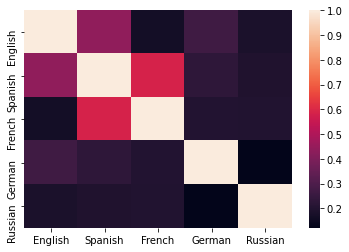

In [30]:
"""
Passing the nested list to this method will create a heatmap of the data. The lighter the square, the higher the correlation.
"""
_u.snsCreateHeatMap(pairing_list,"heatmap.png")